In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
from matplotlib.pyplot import figure

étapes pour voir la corrélation entre le niveau d'études et le salaire :

1- collecter les DATA

2- Analyse statistique: 
  
  Analyse univariée:
    
    quantitatives:

*     Indicateurs de position: mean, mode, mediane, quartiles, quantiles
*     Indicateurs de dispersion: variance,ecart-type, boite à moustache, étendu (min et max), coef de variation
*   indicateur de forme: skewness,kurtosis

    qualitatives:

*     Dénombrement

Analyse bivariée:

*   covariance, fréquence, Khi2,corrélation,kendall, pearson, spearman

3- Regression ou classification:


*   regression: linéaire, polynomiale, réseau de neurones, arbres de décision,forets aleatoires

*   classification: logistique, agglomérative clustering,K-means, arbres de décision, foret aléatoire

4- preparer les données

5- modéliser

6- evaluer le modèle 

7- déploiement

## Methode manuel

In [3]:
X = [6,7,8,9,10,11,12,13,14,15,16,17,18]
Y = [4.4567,5.77,5.9787,7.3317,7.3182,6.5844,7.8185,7.8351,11.0223,10.6738,10.8361,13.615,13.531]

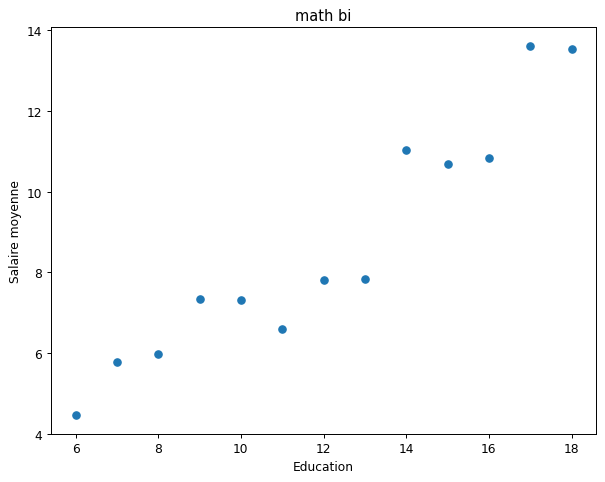

In [4]:
figure(figsize=(8, 6), dpi=88)

plt.plot(X, Y, 'o')
plt.xlabel('Education')
plt.ylabel('Salaire moyenne')
plt.title('math bi')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdad44c5f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdad44c64d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdad44c5cf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdad44c6a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdad44c6f50>],
 'means': [<matplotlib.lines.Line2D at 0x7fdad44c6cb0>]}

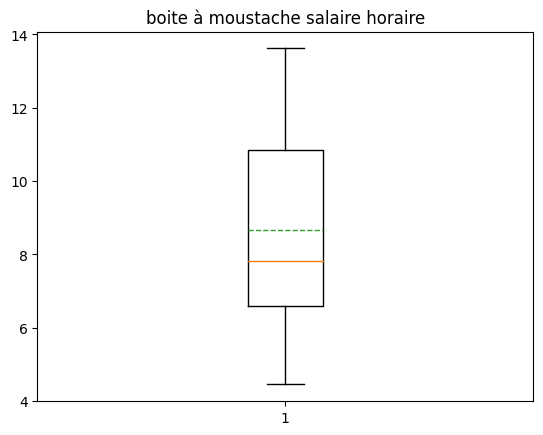

In [5]:
plt.title('boite à moustache salaire horaire')
plt.boxplot(Y,meanline=True,showmeans=True)

On considère que les valeurs de X sont controlées et sans erreurs de mesures
X et Y ne sont pas indépendantes.

La connaissance de X permet d'améliorer la connaissance de Y.

In [7]:
df = pnd.DataFrame()
df["X"] = X
df["Y"] = Y

défi: créer fonction de moyenne et calculer cette moyenne pour X et Y

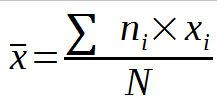

In [9]:
n = len(X)
def calcMoyenne(X):
  somme = 0
  for i in range(n):
      xi = X[i]
      somme += xi
  return somme/n

In [10]:
np.mean(X)

12.0

In [11]:
calcMoyenne(X)

12.0

In [18]:
np.mean(Y)

8.67473076923077

In [12]:
calcMoyenne(Y)

8.674730769230768

calcul de la variance

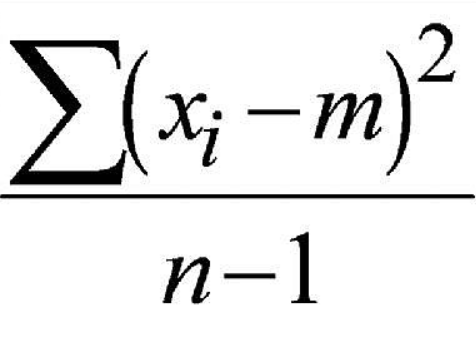

In [13]:
def calcVariance(X):
    somme=0
    for i in X:
      somme+=(i-calcMoyenne(X))**2
    var=somme/(len(X)-1)
    return var

In [14]:
np.var(X, ddof=1)

15.166666666666666

In [15]:
calcVariance(X)

15.166666666666666

In [17]:
np.var(Y, ddof=1)

8.759817860641027

In [16]:
calcVariance(Y)

8.759817860641027

calcul de l'ecart type:

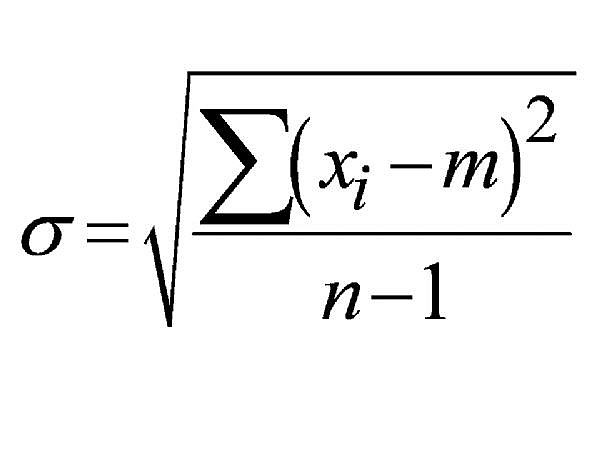

In [19]:
def calcEcartType(X):
  variance = calcVariance(X)
  return np.sqrt(variance)

In [20]:
np.std(X,ddof = 1)

3.8944404818493075

In [21]:
calcEcartType(X)

3.8944404818493075

In [22]:
np.std(Y,ddof = 1)

2.9596989476365714

In [23]:
calcEcartType(Y)

2.9596989476365714

calculer la covariance: la covariance donne le sens (positive ou negative)

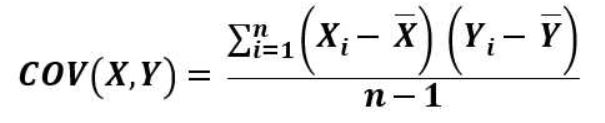

In [24]:
def calcCov(X,Y):
  numérateur=0
  for i,y in zip(X,Y):
    numérateur+=(i-calcMoyenne(X))*(y-calcMoyenne(Y))
  covar=numérateur/(len(X)-1)
  return covar

In [25]:
np.cov(X, X)[0, 1]

15.166666666666666

In [26]:
np.cov(X, Y)[0, 1]

10.982133333333332

In [28]:
np.cov(Y, X)[0, 1]

10.982133333333332

In [27]:
np.cov(Y, Y)[0, 1]

8.759817860641027

In [29]:
calcCov(X, X)

15.166666666666666

In [30]:
calcCov(X, Y)

10.982133333333335

In [31]:
calcCov(Y, X)

10.982133333333335

In [32]:
calcCov(Y, Y)

8.759817860641027

coefficient de corrélation linéaire: donne le sens et la force de la connexion des données

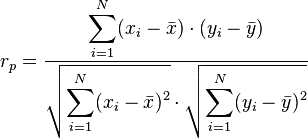

In [36]:
def CalcCorr(X,Y):
  k=calcCov(X,Y)
  corr=k/(calcEcartType(X)*calcEcartType(Y))
  return corr

In [46]:
np.corrcoef(X, Y)

array([[1.        , 0.95278323],
       [0.95278323, 1.        ]])

In [47]:
CalcCorr(X,Y)

0.9527832269373694

##estimations de B0 et B1
$$\hat{\beta_1} = \frac{cov(X,Y)}{S^2(X)}$$

Par cette formule, on cherche à determiner un coefficient B qui défini la proportion de la covariance par rapport au variance 

In [53]:
def beta1(X,Y):
  b1=calcCov(X,Y)/calcVariance(X)
  return b1

In [54]:
beta1(X,Y)

0.7240967032967035

$$\beta_0 = \bar{y} - \hat{\beta_1} \bar{X}$$

In [55]:
def beta0(X,Y):
  b0=calcMoyenne(Y)-(beta1(X,Y)*calcMoyenne(X))
  return b0

In [56]:
beta0(X,Y)

-0.014429670329674238

In [57]:
def predire(x, beta_0, beta_1):
  return beta_0 + x * beta_1

In [59]:
predire(7,beta0(X,Y),beta1(X,Y))

5.05424725274725

In [60]:
predictions=[]
for i in range(6,19):
  k=predire(i,beta0(X,Y),beta1(X,Y))
  predictions.append(k)

In [61]:
from prettytable import PrettyTable
x = PrettyTable()

In [62]:
x.add_column("Education", range(6,19))
x.add_column("salaire réel", Y)
x.add_column("salaire prédit", predictions)
print(x.get_string())

+-----------+--------------+--------------------+
| Education | salaire réel |   salaire prédit   |
+-----------+--------------+--------------------+
|     6     |    4.4567    | 4.330150549450547  |
|     7     |     5.77     |  5.05424725274725  |
|     8     |    5.9787    | 5.778343956043954  |
|     9     |    7.3317    | 6.502440659340658  |
|     10    |    7.3182    | 7.226537362637361  |
|     11    |    6.5844    | 7.950634065934064  |
|     12    |    7.8185    | 8.674730769230768  |
|     13    |    7.8351    | 9.398827472527472  |
|     14    |   11.0223    | 10.122924175824174 |
|     15    |   10.6738    | 10.847020879120878 |
|     16    |   10.8361    | 11.571117582417582 |
|     17    |    13.615    | 12.295214285714286 |
|     18    |    13.531    | 13.01931098901099  |
+-----------+--------------+--------------------+


In [63]:
import pandas as pd
df = pd.DataFrame(list(zip(range(6,19), Y,predictions)),
               columns =['Education', 'salaire réel','salaire prédit'])

In [64]:
df.head()

,Education,salaire réel,salaire prédit
0,6,4.4567,4.330151
1,7,5.7700,5.054247
2,8,5.9787,5.778344
3,9,7.3317,6.502441
4,10,7.3182,7.226537


In [65]:
df['yi-moy(y)']=df['salaire réel'] - df['salaire prédit']

In [66]:
df['(yi-moy(y))^2']=df['yi-moy(y)']**2

In [67]:
df.tail()

,Education,salaire réel,salaire prédit,yi-moy(y),(yi-moy(y))^2
8,14,11.0223,10.122924,0.899376,0.808877
9,15,10.6738,10.847021,-0.173221,0.030005
10,16,10.8361,11.571118,-0.735018,0.540251
11,17,13.6150,12.295214,1.319786,1.741834
12,18,13.5310,13.019311,0.511689,0.261826


In [68]:
somme_réelminpredit=df['yi-moy(y)'].sum()
print(somme_réelminpredit)

1.5987211554602254e-14


In [69]:
somme_réelminpreditau2=df['(yi-moy(y))^2'].sum()
print(somme_réelminpreditau2)

9.69229582571429


##MSE: Mean Squared Error
##RMSE: Root Mean Square Error 

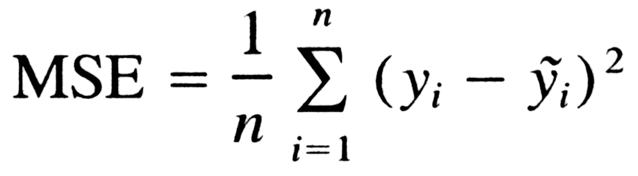

In [70]:
calcMoyenne(df['(yi-moy(y))^2'])

0.7455612173626375

##Methode sklearn

In [71]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(X).reshape(-1,1), Y)

print(reg.coef_) #beta 1, beta 2, ..., beta n
print(reg.intercept_) #beta 0

[0.7240967]
-0.014429670329668909


In [72]:
from sklearn.metrics import mean_squared_error

MSE= mean_squared_error(Y,list(df['salaire prédit']))
RMSE=MSE**0.5
print(MSE)
print(RMSE)

0.7455612173626377
0.8634588683675892
